In [1]:
import pandas as pd

# The U.S. National Epidemiological Survey on Alcohol and Related Conditions (NESARC) is a survey
# designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population. 
# It is a representative sample of the non-institutionalized population 18 years and older.
#
# Selected variables
# MAJORDEP12 - MAJOR DEPRESSION IN THE LAST 12 MONTHS (NON-HIERARCHICAL) (
#     0 - No,
#     1 - Yes)
# ALCABDEP12DX - ALCOHOL ABUSE/DEPENDENCE IN THE LAST 12 MONTHS (
#     0 - No alcohol diagnosis,
#     1 - Alcohol abuse only,
#     2 - Alcohol dependence only,
#     3 - Alcohol abuse and dependence)
# TAB12MDX - NICOTINE DEPENDENCE IN THE LAST 12 MONTHS (
#     0 - No nicotine dependence,
#     1 - Nicotine dependence)

cols = ['MAJORDEP12', 'ALCABDEP12DX', 'TAB12MDX']

# Load the data
df = pd.read_csv('nesarc.csv', usecols=cols, low_memory=False)

In [2]:
# Print first 5 rows of the data set
print(df.head())

   MAJORDEP12  ALCABDEP12DX  TAB12MDX
0           0             0         0
1           0             0         0
2           0             0         0
3           0             0         0
4           0             0         0


In [3]:
# Store feature matrix X and response vector y
X = df[['ALCABDEP12DX', 'TAB12MDX']]
y = df.MAJORDEP12

In [4]:
print(X.shape)
print(y.shape)

(43093, 2)
(43093L,)


In [5]:
# Split the dataset into a training set and a testing set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [6]:
# Import a classifier, fit the model and predict the response y for the observations in X
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [7]:
# Compute classification accuracy for the decision tree model 
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train accuracy: {0}'.format(round(accuracy_score(y_train, y_train_pred), 2)))
print('Test accuracy: {0}'.format(round(accuracy_score(y_test, y_test_pred), 2)))

Train accuracy: 0.92
Test accuracy: 0.92


In [8]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[15865     0]
 [ 1373     0]]


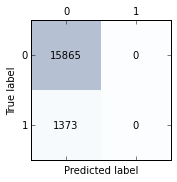

In [11]:
import matplotlib.pylab as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
        s=confmat[i, j],
        va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

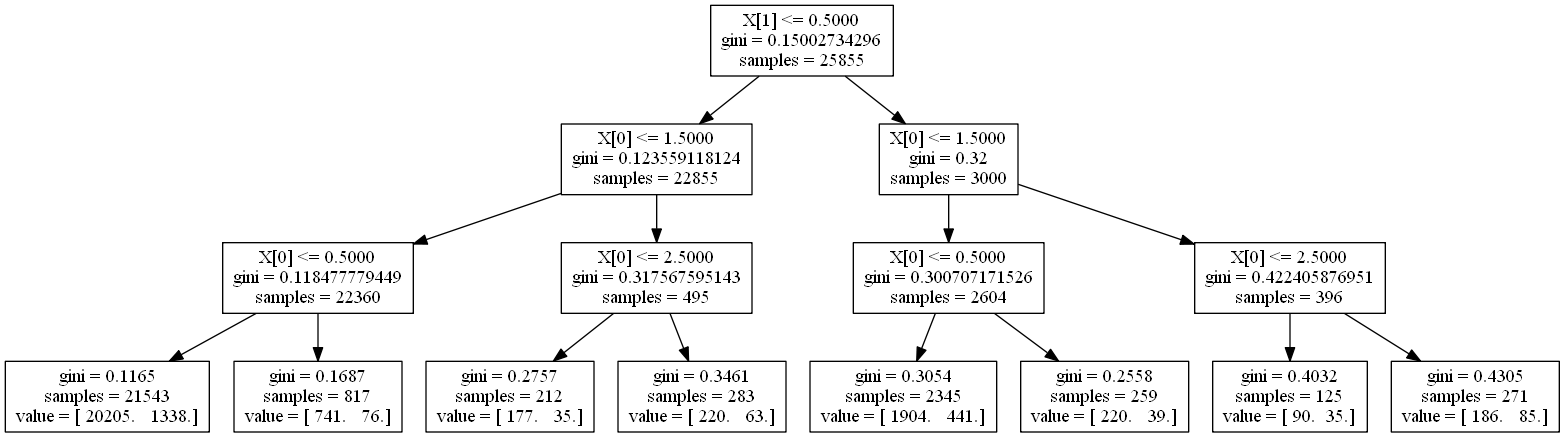

In [12]:
# Display the decision tree
import pydotplus
from io import BytesIO as StringIO
from IPython.display import Image

dotfile = StringIO()
tree.export_graphviz(clf, out_file=dotfile)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

In [ ]:
# Model interpretation for the decision tree
#
# Decision tree analysis was performed to test nonlinear relationships among a series of explanatory
# variables and a binary, categorical response variable.
#
# The following explanatory variables were included to a classification tree model evaluating
# major depression in the last 12 months: alcohol abuse/dependence
# and nicotine dependence in the last 12 months.
#
# The resulting tree started with the split on X[1], nicotine dependence explanatory variable. 
# The second and the third splits were made on alcohol use, variable X[0]. It can be seen that
# people with a nicotine dependence score less than 0.5 and an alcohol abuse/dependence score
# less than 0.5 or people with a nicotine dependence score greater than 0.5 but with
# an alcohol abuse/dependence score less than 0.5 were less likely to have major depression
# compared to those not meeting the cutoffs.
#
# The train and test accuracy of the model is 0.92 with the number of 15865 true negatives, 
# 1373 false negatives, 0 true positives and 0 false positives predicted on the train set. 